## Multi-Chain Convergence and Parallel Sampling

To ensure an MCMC run is reliable, we must verify that independent chains starting from different locations converge to the same target distribution. We measure this using the **Gelman-Rubin R-hat statistic**.

In [1]:
import numpy as np
from PyMCMC import FunctionFitter, Prior, MCMCAnalyzer
from models import linear_model

# Generate synthetic data: y = a*x + b + noise
np.random.seed(42)
x_obs = np.linspace(0, 10, 30)
true_params = [2.5, 5.0]  # slope, intercept
y_true = true_params[0] * x_obs + true_params[1]
y_err = 0.8
y_obs = y_true + np.random.normal(0, y_err, size=len(x_obs))

# Reuse the model from Tutorial 1
fitter = FunctionFitter(linear_model, x_obs, y_obs, y_err=y_err)

# Start 4 chains from different initial guesses
initial_positions = [
    [1.0, 1.0], [5.0, 1.0], [1.0, 10.0], [8.0, 8.0]
]

# Run in parallel using multiple CPU cores
chains = fitter.fit_parallel(initial_positions, n_iterations=5000, num_workers=4)

if $R\text{-hat} < 1.1$, the chains have likely converged.

Automatic Burn-in detected: 50.0%
Convergence Diagnostic (R-hat): [1.00582356 1.03371724]


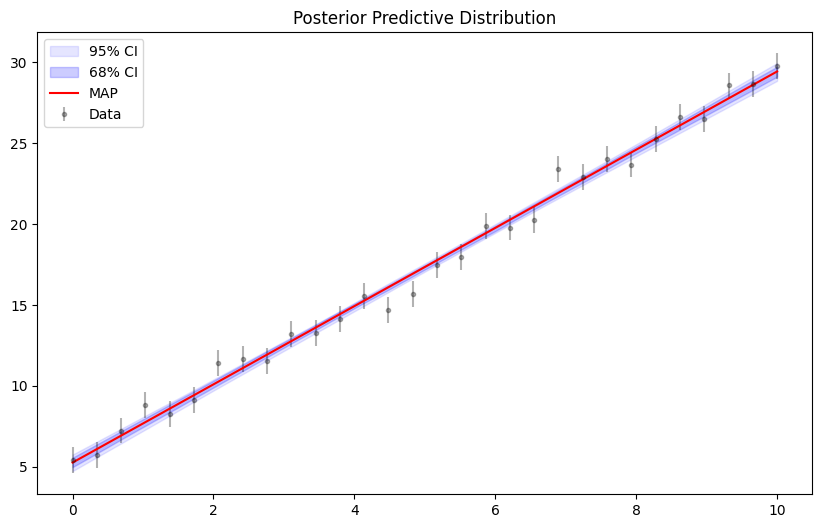

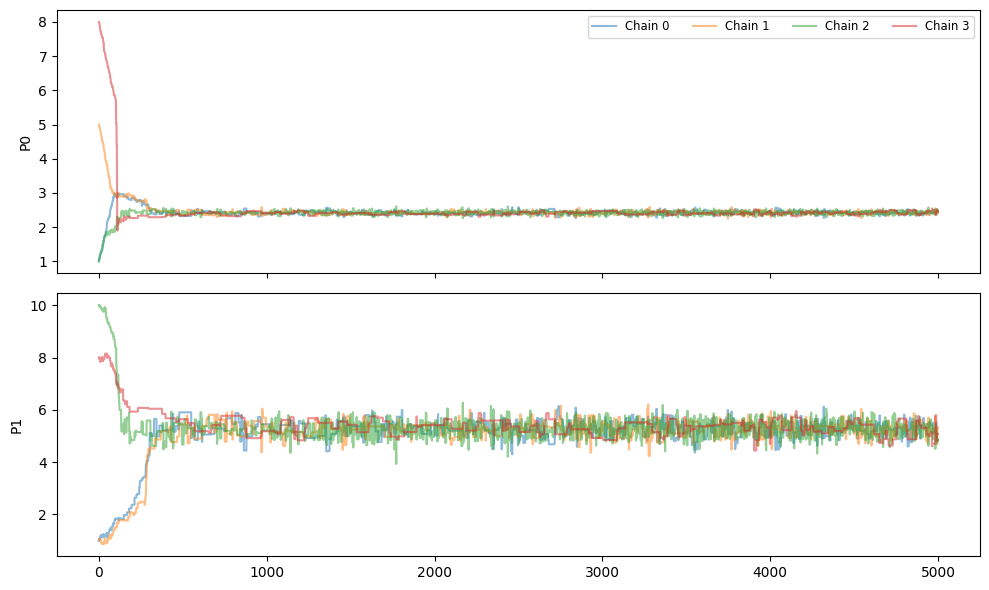

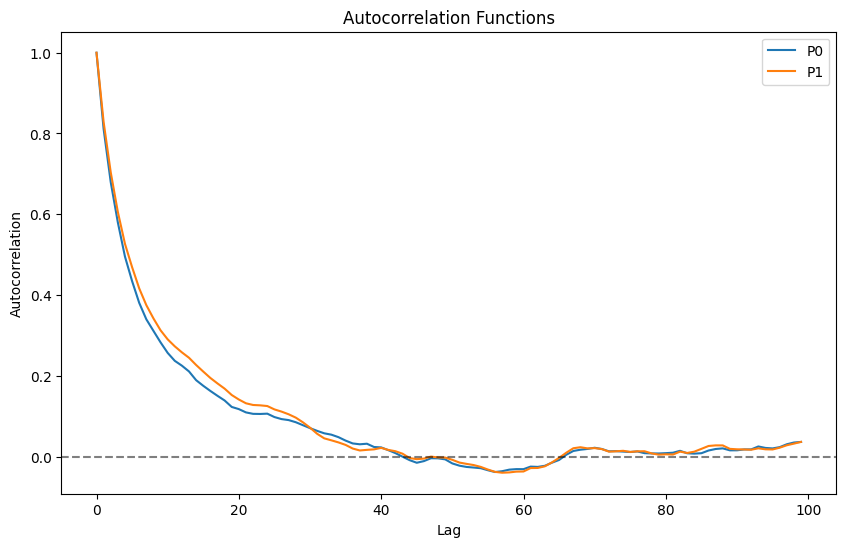

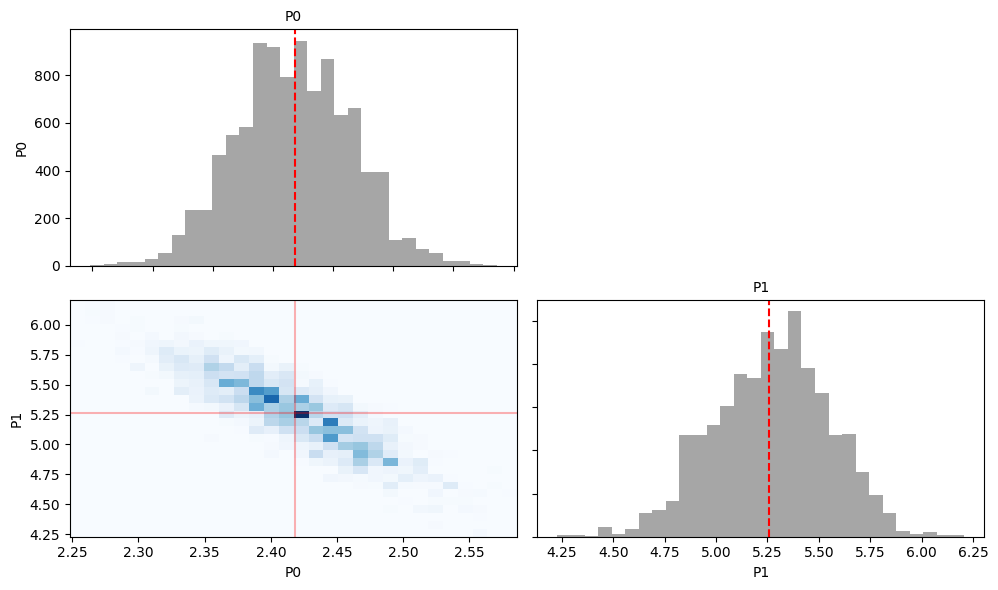

In [5]:
analyzer = MCMCAnalyzer(chains, fitter=fitter)
# The R-hat values are printed during initialization
analyzer.plot_posterior_predictive()
analyzer.plot_traces()
analyzer.plot_autocorrelation()
analyzer.plot_corner()